In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt

Teraz wczytam dane którymi będą dane z kolokwium z fizyki z pliku dane_z_fizyki.csv

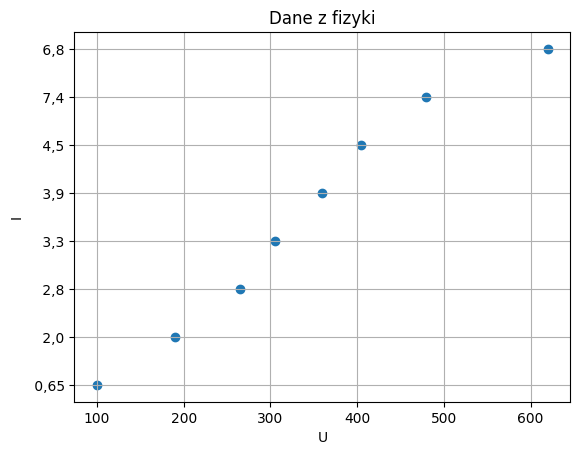

In [13]:
with open('dane_z_fizyki.csv') as f:
    data = pd.read_csv(f, sep=';')

x = data['I']
y = data['U']

wykres = plt.figure()
plt.scatter(x, y)
plt.xlabel('U')
plt.ylabel('I')
plt.title('Dane z fizyki')
plt.grid()
plt.show()

In [25]:
X1 = np.array(x)
Y = np.array(y)
m=len(X1)
print(X1)
print(Y)

[100 190 265 305 360 405 480 620]
[' 0,65' ' 2,0' ' 2,8' ' 3,3' ' 3,9' ' 4,5' ' 7,4' ' 6,8']


In [26]:
X1 = X1.reshape(m, 1) # zmiana wymiarów macierzy X1 z (m,) na (m, 1)
bias = np.ones((m, 1)) # bias - to macież jednostkowa o wymiarach m x 1
X1 = np.hstack((bias, X1)) # dodanie biasu do macierzy X1
print(X1)
print(X1.shape)


[[  1. 100.]
 [  1. 190.]
 [  1. 265.]
 [  1. 305.]
 [  1. 360.]
 [  1. 405.]
 [  1. 480.]
 [  1. 620.]]
(8, 2)


### <a name='2'></a> Równanie normalne

Regresja liniowa w $R^2$:
$$Y = w_0 + w_1X_1$$
$$Y = W^TX$$
gdzie: $$W= \left[\begin{matrix}w_0\\w_1\end{matrix}\right]$$ $$ X= \left[\begin{matrix}1\\X_1\end{matrix}\right] $$ stąd $$ W^T= \left[\begin{matrix}w_0&w_1\end{matrix}\right] $$    
$$Y = W^TX = \left[\begin{matrix}w_0&w_1\end{matrix}\right] \cdot  \left[\begin{matrix}1\\X_1\end{matrix}\right] = w_0 + w_1X_1$$

Równanie normalne - równanie pozwalające obliczyć minimum funkcji straty (o ile istnieje)
$$W = (X^TX)^{-1}(X^TY)$$